# Rekursion

#### Setup der Bibliotheken in Jupyter

Turtle Grafik gehört nicht zum Standardumfang der Java Programmiersprache. Die Funktionalität die wir hier nutzen wird von einer externen *Bibliothek* zur Verfügung gestellt. Java und die Jupyter-Notebook Umgebung wissen zunächst mal nichts von dieser Bibliothek. Damit wir die Befehle in dieser Bibliothek verwenden können, müssen wir Sie zuerst im Jupyter-Notebook zur Verfügung stellen. Dies geschieht mit den folgenden Befehlen:

In [6]:
%mavenRepo shapemodelling-repo https://shapemodelling.cs.unibas.ch/repo/
%maven ch.unibas.informatik:jturtle:0.7

In [7]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*

## Rekursion

Wir haben bereits gesehen, dass wir innerhalb einer Methode eine andere Methode aufgerufen können. In diesem Notebook wollen wir den Fall betrachten, wo eine Methode sich selbst wieder aufruft. Dies nennt man dann Rekursion. Rekursion kennt man bereits aus der Mathematik. So ist zum Beispiel die Fakultätsfunktion rekursiv definiert als:

$
0! = 1 \\
n! = n \cdot (n - 1)!
$


Wir können dies genau analog der mathematischen Definition in Java umsetzen:


In [8]:
class RecComputations {
    static int factorial(int n) {
        if (n == 0) {
            return 1;
        } else { 
            return n * factorial(n - 1);
        }
    }
}

In [9]:
System.out.println(RecComputations.factorial(5));

120


#### Miniübung:

* Fügen Sie mit ```System.out.println``` Ausgaben hinzu um zu verstehen was diese Methode genau macht


Ein weiteres Beispiel von rekursiv definierten Folgen ist die Fibonaccifolge:

$
f_0 = 0 \\
f_1 = 1 \\
f_n = f_{n -1} + f_{n - 2}
$

Auch die Implementation dieser Funktion folgt genau der Struktur der mathematischen Definition. Der Unterschied ist in diesem Fall nur, dass 
wir hier zwei Fälle haben, in den wir die Rekursion abbrechen.

#### Miniübung:

* Implementieren Sie die Finbonaccifolge
* Geben Sie die ersten 20 Elemente der Fibonaccifolge aus.


Rekursion lässt sich auch bestens mit Turtlegrafik veranschaulichen. Ein berühmtes Beispiel einer Rekursiven Funktion ist das Sierpinski Dreieck. Dabei werden in jedem Dreieck wieder 3 kleinere Dreiecke gezeichnet. Wir brechen ab, wenn wir eine bestimmte Rekursionstiefe erreicht haben. 

Beachten Sie dass wir hier zusätzlich auch das turtle als Parameter mitübergeben müssen. Wir werden später sehen, wie wir mit solchen Komplexeren Argumenten arbeiten. Im Moment reicht für Sie zu wissen, dass das turtle durch den Parameter ```turtle``` welcher vom Typ ```Turtle``` ist übergeben wird. 

In [10]:
class Drawing {
    static void drawSierpinski(double length, int depth) {
        if (depth==0){
            for (int i = 0; i < 3; i++) {
                forward(length);
                turnLeft(120);
            }
        }
        else {
            drawSierpinski(length/2.0 , depth-1);
            forward(length/2);
            drawSierpinski(length/2.0,depth-1);
            backward(length/2);
            turnLeft(60);
            forward(length/2);
            turnRight(60);
            drawSierpinski(length/2.0,depth-1);
            turnLeft(60);
            backward(length/2);
            turnRight(60);
        }
    }
}

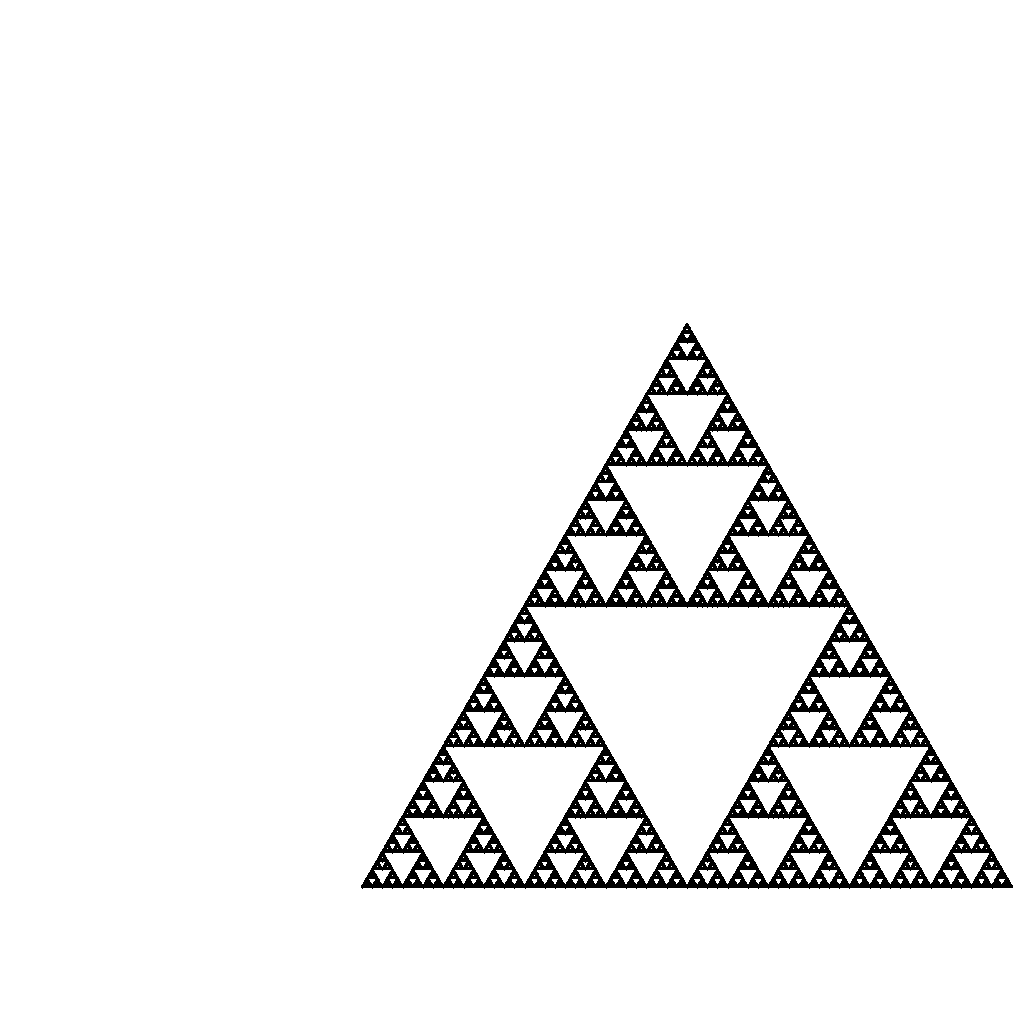

fc892fff-2bf0-4044-90f7-0f1d4f48eb17

In [11]:
home();
clear();
penUp();
goTo(-30, -75);
turnRight(90);
penDown();
Drawing.drawSierpinski(130, 10);
display(drawing());

#### Miniübung:

* Schauen Sie wie die Zeichnung aufgebaut ist indem Sie die Methode für depth 0, 1, 2, ... ausführen.

### Drachenkurve

Methoden können nicht nur sich selbst, sondern auch andere Methoden aufrufen, die wiederum die erste Funktion aufruft. Ein Beispiel von einem solchen Rekurssionsschema wird beim Zeichnen einer Drachenkurve benutzt. Hier ruft die Methode ```f1``` die Methode ```f2``` auf, die wiederum die Methode ```f1``` aufruft. 

In [12]:
class DragonCurve {
  
    static void f1(int depth, double length) {
        if (depth <= 0) {
            forward(length);
            return;
        } else {
            f1(depth - 1, length * Math.sqrt(0.5));
            turnRight(90);  
            f2(depth - 1, length * Math.sqrt(0.5));
        }
    }
    static void f2(int depth, double length) {
        if (depth <= 0) {
            forward(length);
            return;
        } else {
            f1(depth - 1, length * Math.sqrt(0.5));
            turnLeft(90);  
            f2(depth -1, length * Math.sqrt(0.5));
        }
    }
}

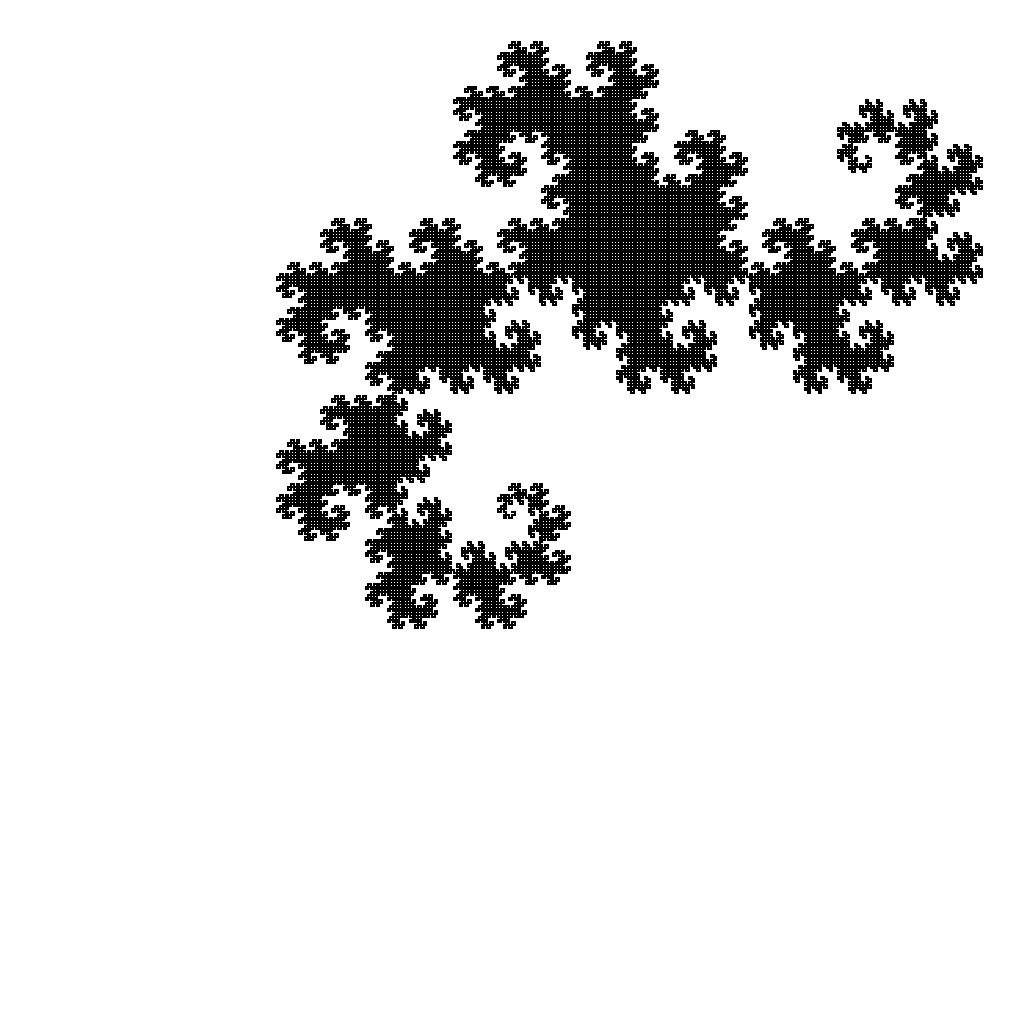

e876aae8-cac3-477b-a35e-228b64c30bbd

In [13]:
home();
clear();
penUp();
goTo(0, 0);
turnRight(90);
penDown();
DragonCurve.f1(15, 100);
display(drawing());

### Miniübung

* Setzen Sie die Stiftfarbe unterschiedlich in beiden Methoden um herauszufinden, was von welcher Methode gezeichnet wird. 
    * Erkennen Sie ein Muster?